<a href="https://colab.research.google.com/github/vinayak91136912/AIMLPROJECT/blob/main/MIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error,r2_score,mean_absolute_error,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PolynomialFeatures
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.exceptions import ConvergenceWarning


In [ ]:
#import file
from google.colab import files
uploaded=files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (1).csv


In [ ]:
#read the file
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#create average total spend
df['Total_Spend'] = df[['Fresh','Milk','Grocery','Frozen',
                        'Detergents_Paper','Delicassen']].sum(axis=1)
df['Avg_Spend'] = df['Total_Spend'] / 6


In [ ]:
#log transformation
df['Log_Total_Spend'] = np.log1p(df['Total_Spend'])
df['Log_Grocery'] = np.log1p(df['Grocery'])


In [ ]:
#Interaction feature
df['Total_Spend'] = df[['Fresh','Milk','Grocery','Frozen',
                        'Detergents_Paper','Delicassen']].sum(axis=1)

df['Essential_Spend'] = df[['Milk','Grocery','Detergents_Paper']].sum(axis=1)
df['Luxury_Spend'] = df[['Fresh','Frozen','Delicassen']].sum(axis=1)

df['Essential_Ratio'] = df['Essential_Spend'] / df['Total_Spend']
df['Luxury_Ratio'] = df['Luxury_Spend'] / df['Total_Spend']


In [ ]:
#categorical encoding
df_encoded=pd.get_dummies(df,columns=["Region"])
df_encoded


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend,Avg_Spend,Log_Total_Spend,Log_Grocery,Essential_Spend,Luxury_Spend,Essential_Ratio,Luxury_Ratio,Region_1,Region_2,Region_3
0,2,12669,9656,7561,214,2674,1338,34112,5685.333333,10.437434,8.930891,19891,14221,0.583109,0.416891,False,False,True
1,2,7057,9810,9568,1762,3293,1776,33266,5544.333333,10.412321,9.166284,22671,10595,0.681507,0.318493,False,False,True
2,2,6353,8808,7684,2405,3516,7844,36610,6101.666667,10.508104,8.947026,20008,16602,0.546517,0.453483,False,False,True
3,1,13265,1196,4221,6404,507,1788,27381,4563.500000,10.217641,8.348064,5924,21457,0.216354,0.783646,False,False,True
4,2,22615,5410,7198,3915,1777,5185,46100,7683.333333,10.738590,8.881697,14385,31715,0.312039,0.687961,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,73302,12217.000000,11.202357,9.682092,28260,45042,0.385528,0.614472,False,False,True
436,1,39228,1431,764,4510,93,2346,48372,8062.000000,10.786697,6.639876,2288,46084,0.047300,0.952700,False,False,True
437,2,14531,15488,30243,437,14841,1867,77407,12901.166667,11.256845,10.317053,60572,16835,0.782513,0.217487,False,False,True
438,1,10290,1981,2232,1038,168,2125,17834,2972.333333,9.788918,7.711101,4381,13453,0.245654,0.754346,False,False,True


In [ ]:
#Scaling and normalization
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[ 1.44865163e+00,  5.90668285e-01,  5.29331898e-02, ...,
        -1.46932656e-01,  4.03965238e-01, -4.03965238e-01],
       [ 1.44865163e+00,  5.90668285e-01, -3.91301970e-01, ...,
        -3.71156305e-01,  7.59837624e-01, -7.59837624e-01],
       [ 1.44865163e+00,  5.90668285e-01, -4.47029261e-01, ...,
         3.03004931e-04,  2.71627148e-01, -2.71627148e-01],
       ...,
       [ 1.44865163e+00,  5.90668285e-01,  2.00325540e-01, ...,
         1.47111986e-02,  1.12514409e+00, -1.12514409e+00],
       [-6.90297086e-01,  5.90668285e-01, -1.35383889e-01, ...,
        -1.94424042e-01, -8.16492124e-01,  8.16492124e-01],
       [-6.90297086e-01,  5.90668285e-01, -7.29306983e-01, ...,
        -8.46750372e-01,  5.27771866e-01, -5.27771866e-01]])

In [ ]:
#polynomial engineering
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features_scaled)


In [ ]:
#separate X and y
X = df.drop('Channel', axis=1)
y = df['Channel']


In [ ]:
#Outliers
numeric_cols = df.select_dtypes(include=np.number).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (df[numeric_cols] > (Q3 + 1.5 * IQR)))


outlier_count = outliers.sum()
print(outlier_count)



Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
Total_Spend         20
Avg_Spend           20
Log_Total_Spend     15
Log_Grocery          2
Essential_Spend     27
Luxury_Spend        20
Essential_Ratio      0
Luxury_Ratio         0
dtype: int64


In [ ]:
#scaling on numerical data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Channel', axis=1))

In [ ]:
#VIf
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(scaled_features, i) for i in range(scaled_features.shape[1])]
vif["features"] = df.drop('Channel', axis=1).columns
vif


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.011298,Region
1,inf,Fresh
2,inf,Milk
3,inf,Grocery
4,inf,Frozen
5,inf,Detergents_Paper
6,inf,Delicassen
7,inf,Total_Spend
8,inf,Avg_Spend
9,5.658525,Log_Total_Spend


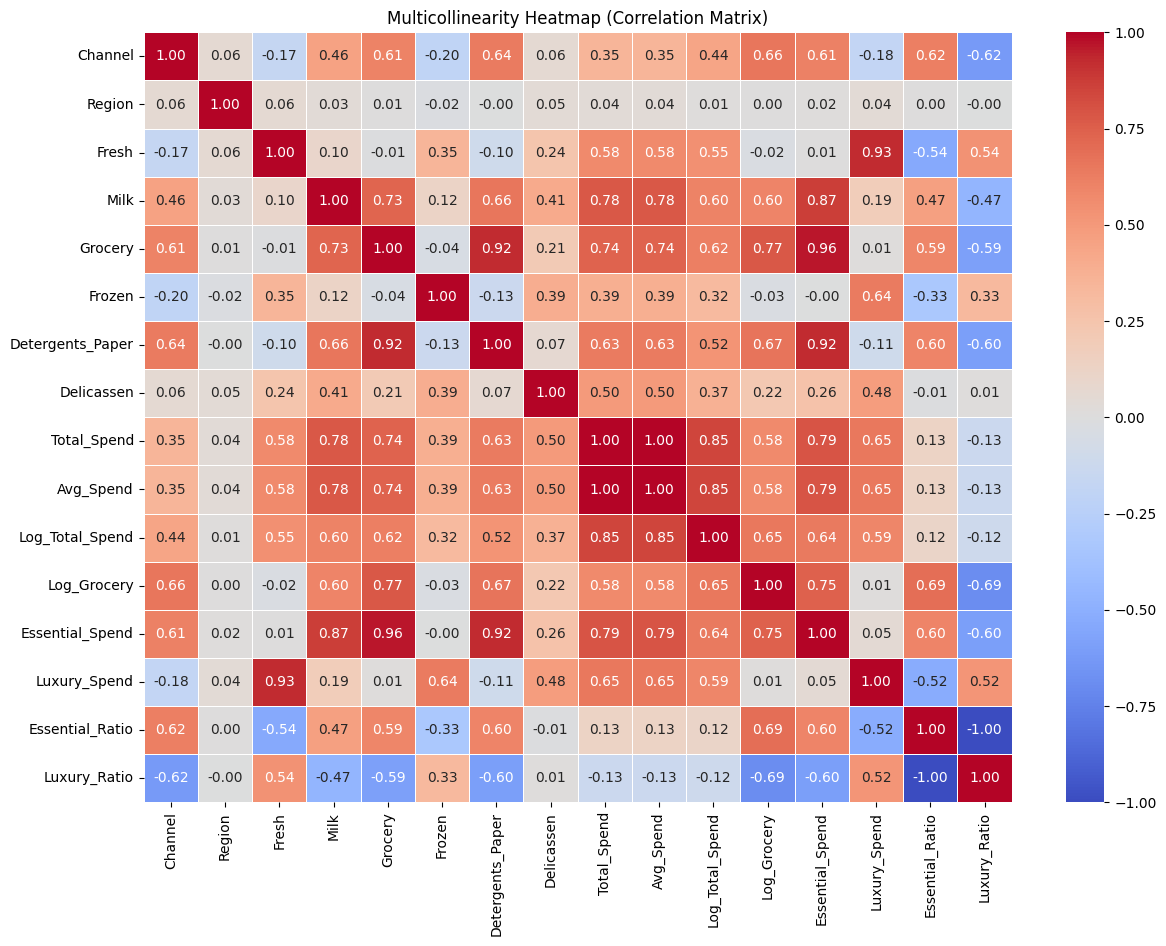

In [ ]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Multicollinearity Heatmap (Correlation Matrix)")
plt.show()

In [ ]:

#create a new target variable
y = df['Total_Spend']
X = df.drop(['Total_Spend','Channel'], axis=1)



In [ ]:
#test and train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
#predict the data
y_pred = lr.predict(X_test)

In [ ]:
#Evaluate using MAE,RMSE,R2 score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 9.2138014389837e-12
RMSE: 1.479446585660972e-11
R2: 1.0


In [ ]:
#Apply Ridge or Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [ ]:
# Target variable (Customer Channel)
y = df['Channel']   # 1 = Horeca (Hotel/Restaurant/Cafe), 2 = Retail

# Convert to binary (required for ROC)
y = y.map({1: 0, 2: 1})

# Feature variables
X = df.drop(columns=['Channel', 'Region'])


In [ ]:
LogisticRegression(max_iter=500)


LogisticRegression(max_iter=500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


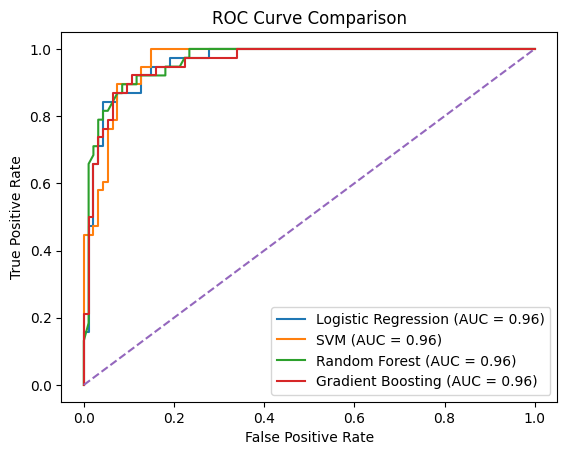

In [ ]:
plt.figure()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
#Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(precision_score(y_test, pred))
    print(recall_score(y_test, pred))
    print(f1_score(y_test, pred))
    print(roc_auc_score(y_test, pred))
    print(r2_score(y_test, pred))
    print(mean_absolute_error(y_test, pred))
    print(mean_squared_error(y_test, pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0.9242424242424242
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        94
           1       0.89      0.84      0.86        38

    accuracy                           0.92       132
   macro avg       0.91      0.90      0.91       132
weighted avg       0.92      0.92      0.92       132

[[90  4]
 [ 6 32]]
0.8888888888888888
0.8421052631578947
0.8648648648648649
0.8997760358342666
0.6304591265397537
0.07575757575757576
0.07575757575757576
SVM 0.8863636363636364
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.81      0.79      0.80        38

    accuracy                           0.89       132
   macro avg       0.86      0.86      0.86       132
weighted avg       0.89      0.89      0.89       132

[[87  7]
 [ 8 30]]
0.8108108108108109
0.7894736842105263
0.8
0.8575027995520716
0.4456886898096306
0.11363636363636363
0.113636363

In [ ]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled_features)

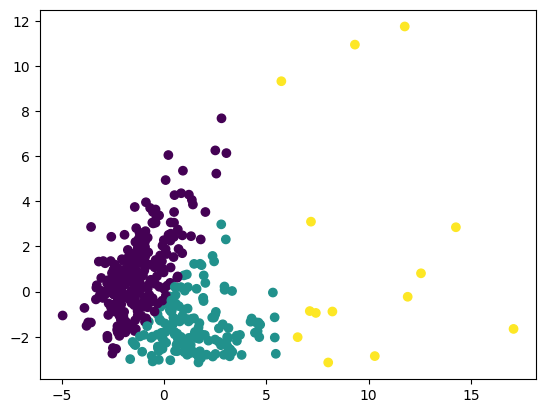

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Cluster'])
plt.show()